### Import Packages

In [1]:
# Data
import pandas as pd

# Identification
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from numpy import reshape, vstack, zeros, linspace
import numpy as np
from _ident import Ident
from ezmod import alpha_filter

# Visualization
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Export

import pickle

#scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

## Import Data

In [2]:
# Importing data from the finalized data set
#df_5 = pd.read_excel('D50_full_01.xlsx',header=0,index_col=0)

# df= pd.read_excel('cube_interp.xlsx',header=0,index_col=0)#
#df= pd.read_excel('full_cleansed_data.xlsx',header=0)#,index_col=0)
#df_5.drop(columns=['minute'], inplace=True)

#87805 full cleansed data
#87812 full data set

df0=pd.read_excel('smooth_interp.xlsx',header=0,index_col=0)
df2=pd.read_excel('CC_74869:184828.xlsx',header=0,index_col=0)
df3=pd.read_excel('CC_185802:229370.xlsx',header=0,index_col=0)

In [3]:
df2.columns = [ 'F', 'FW', 'P', 'MS', 'BP1_only','SW','SL','D','PS','CP','BP','D50'] ### *** change depend on data set
df3.columns = [ 'F', 'FW', 'P', 'MS', 'BP1_only','SW','SL','D','PS','CP','BP','D50'] ### *** change depend on data set


In [4]:
df0=df0.drop(columns=['minute'])
df0.head()

tons /hr  Feed_water  Mill_speed    Cyc_flow  Sump_water     Mill_BP1  \
0  102.462509   15.509874   15.160000  525.208252   50.587109  6104.048340   
1  103.333893   16.375196   15.160000  529.151917   54.062538  6108.159180   
2  103.808968   16.706270   15.160000  527.527954   43.480278  6085.975586   
3  102.219231   17.050024   15.156041  520.946472   37.862888  6116.854980   
4  102.523087   16.613831   15.150989  520.562073   38.544147  6100.854492   

   Mill_power  Sump_level  Cyc_density  Cyc_pressure      D50C  
0      2151.0   40.304512    54.255432     11.241975  0.117296  
1      2155.0   43.349667    54.202900     11.241036  0.117299  
2      2160.0   46.226486    54.150364     11.240097  0.117301  
3      2153.0   38.813515    54.099995     11.239159  0.117303  
4      2162.0   34.497410    54.051334     11.238220  0.117305

In [8]:
df0.columns = [ 'F', 'FW', 'MS', 'PS', 'SW', 'BP', 'P', 'SL', 'D', 'CP','D50']

In [375]:
df_5=df_5.reset_index()
df_5.drop(columns=['minute','Mill_BP2','Mill_BP3','Mill_BP4'], inplace=True) #drop time

#df_5['D50C']=df_5['D50C'].clip(upper=0.5) # Filter D50 data that is bad calculation
df_5=df_5.clip(0.1)
df_5.columns = [ 'F', 'FW', 'MS', 'PS', 'SW', 'BP1_only', 'P', 'SL', 'D', 'CP','BP','D50'] ### *** change depend on data set
df_5.head()

F         FW         MS          PS         SW     BP1_only     P  \
0  103.378250  14.785725  15.160000  526.717224  50.408730  6112.908203  2159   
1  102.462509  15.509874  15.160000  525.208252  50.587109  6104.048340  2151   
2  103.333893  16.375196  15.160000  529.151917  54.062538  6108.159180  2155   
3  103.808968  16.706270  15.160000  527.527954  43.480278  6085.975586  2160   
4  102.219231  17.050024  15.156041  520.946472  37.862888  6116.854980  2153   

          SL          D         CP           BP       D50  
0  41.932579  54.307968  11.242914  5815.571289  0.117294  
1  40.304512  54.255432  11.241975  5796.312866  0.117296  
2  43.349667  54.202900  11.241036  5824.649536  0.117299  
3  46.226486  54.150364  11.240097  5795.630981  0.117301  
4  38.813515  54.099995  11.239159  5811.616943  0.117303

In [5]:
df3.head()

F         FW       P         MS     BP1_only          SW  \
185802  0.010000  29.372545  2286.0  15.134733  5677.970703    0.574140   
185803  0.010000  30.605871  2261.0  15.134733  5687.847656    0.461805   
185804  0.010000  29.704786  2253.0  15.134733  5716.207520    9.323709   
185805  0.010000  29.126558  2249.0  15.134733  5755.247559  106.823448   
185806  0.010475  30.668139  2233.0  15.134733  5770.683105   21.499142   

               SL          D          PS        CP           BP       D50  
185802  51.808495   0.010000    4.099216  0.010000  5333.994385  0.550136  
185803  53.995605   0.010000    3.978538  0.192707  5362.849121  0.286941  
185804  40.797295  40.924122  212.379562  0.548710  5378.637329  0.227937  
185805  59.668468  41.050247  176.931808  1.138341  5444.276611  0.194129  
185806  80.572121  41.176369  378.939209  6.513471  5438.682739  0.132261

In [152]:
df_5=df_5.clip(0.1)
df_5.dropna().describe()

F            FW            MS            PS            SW  \
count  87080.000000  87080.000000  87080.000000  87080.000000  87080.000000   
mean      96.451189     16.436786     14.469327    472.997440     45.119174   
std       25.098239      6.706166      2.630743     95.136259     16.236091   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%       99.590031     14.866406     15.134733    456.252983     37.919252   
50%      103.390316     16.164640     15.139745    491.852524     45.786772   
75%      106.395195     17.990403     15.155671    521.534241     54.257071   
max      212.381058    110.265762     15.185266    725.713135    190.012161   

           BP1_only             P            SL             D            CP  \
count  87080.000000  87080.000000  87080.000000  87080.000000  87080.000000   
mean    5931.148038   2003.832005     41.118735     52.292089     10.507363   
std      492.141153    415.564199     11.383940      8.928619      2.290719   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%     5947.533081   2036.000000     36.316805     53.427090      9.850410   
50%     6038.723389   2154.000000     40.089602     54.019854     10.910160   
75%     6095.024414   2168.000000     43.654921     54.594406     11.460269   
max     6418.649902   2352.000000    103.256409     60.934116     23.790096   

                 BP           D50  
count  87080.000000  87080.000000  
mean    5656.954186      0.121378  
std      452.701694      0.015457  
min        1.000000      0.100000  
25%     5659.327576      0.116801  
50%     5732.884155      0.118072  
75%     5785.575623      0.120756  
max     6684.823364      0.199742

In [42]:
df2=df2.reset_index()

df3=df3.reset_index()

## Plot

In [7]:
df0.plot(kind='line',subplots=True,layout=(14,1),figsize=(30,15))
plt.show()

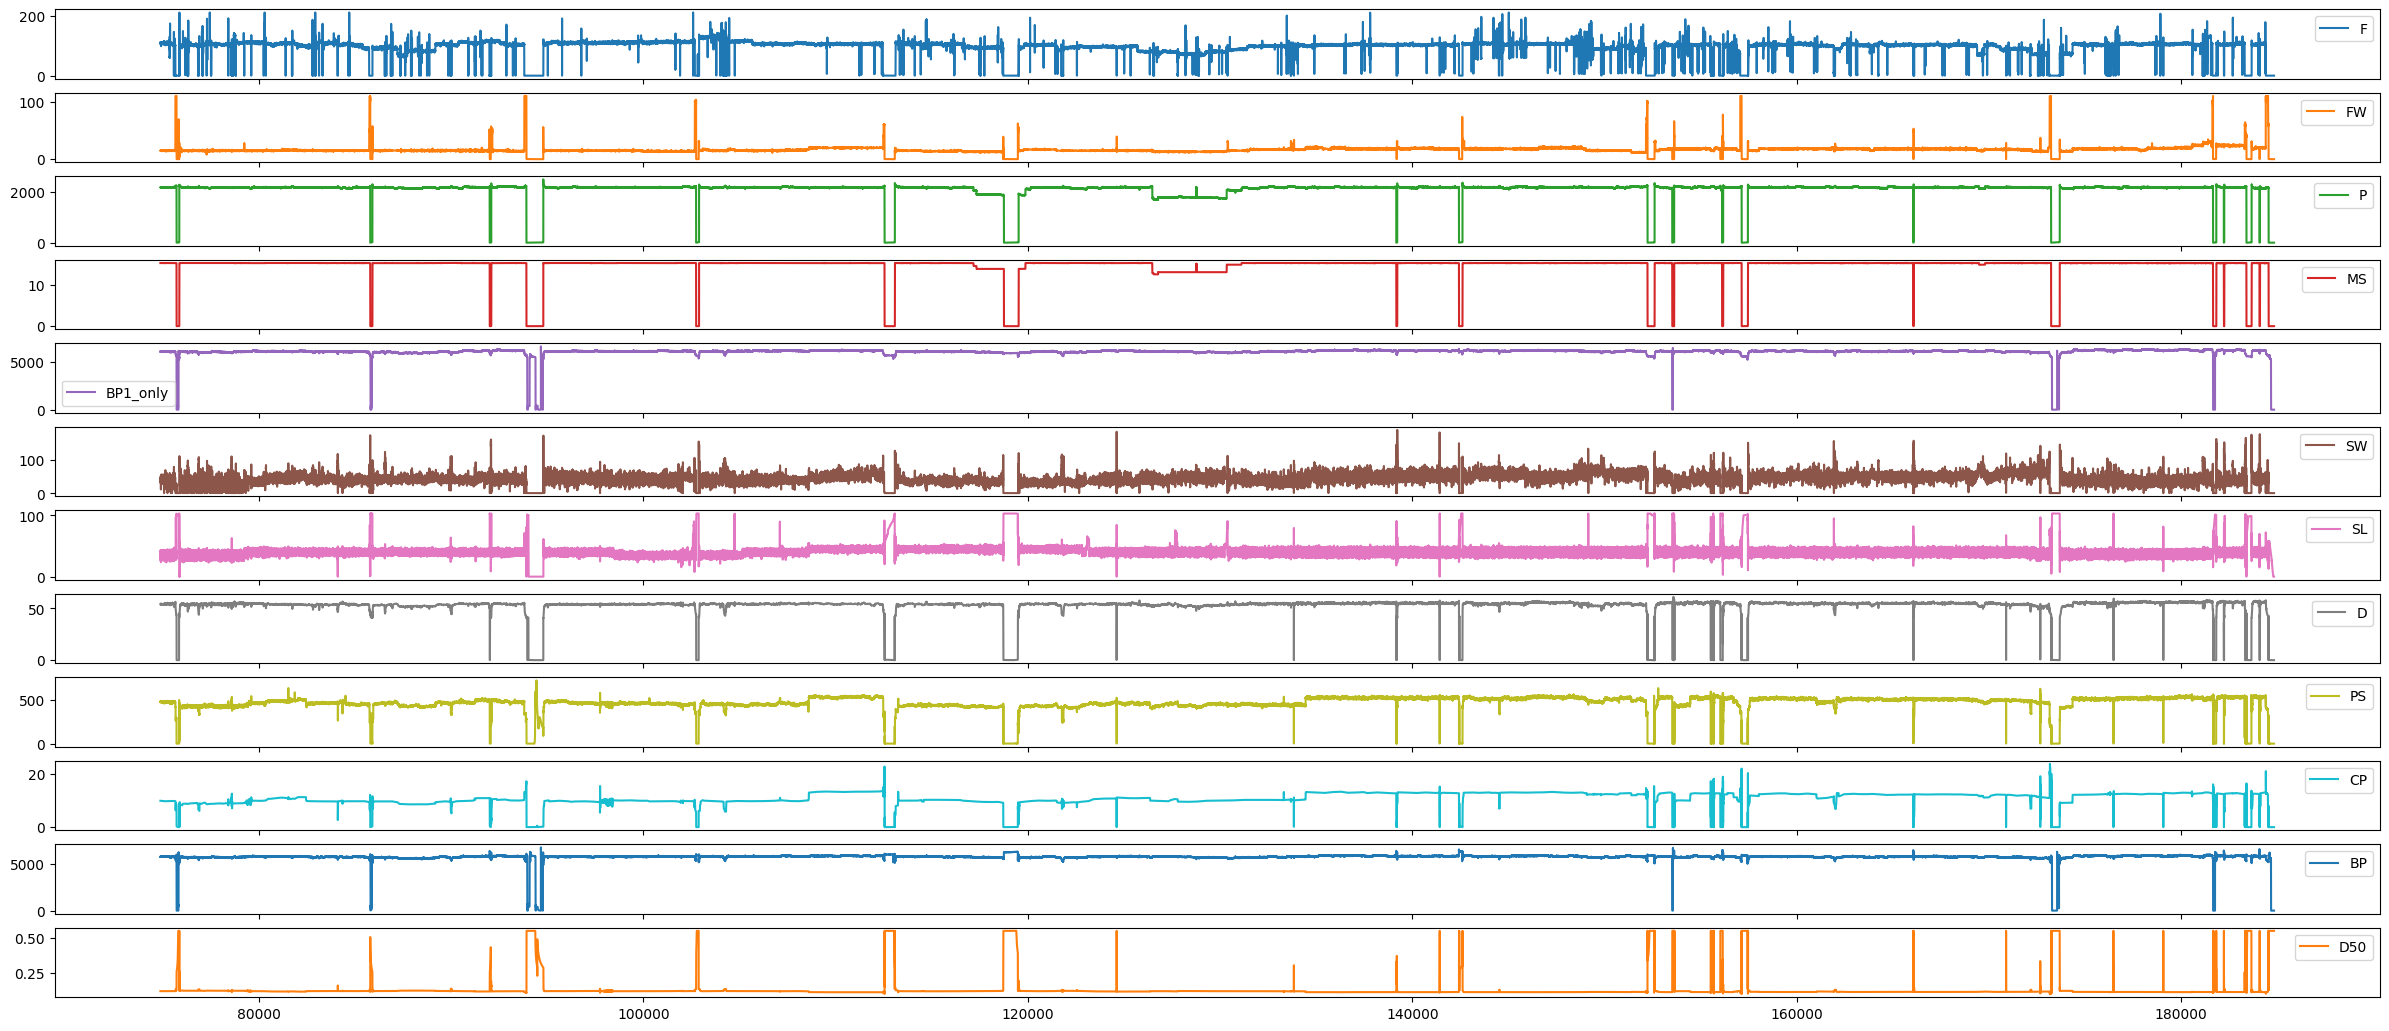

In [6]:
df2.plot(kind='line',subplots=True,layout=(14,1),figsize=(30,15))
plt.show()

In [363]:
#df=pd.read_excel('1_minute_mother_data.xlsx',header=0,index_col=0)
# # Data Filtering: For clipping data
# #df0 = df0[~(df0['Date'] < '2019-11-02')]
# df0=df.copy()
# df_6 = df0[#(df0['F'] >= 0 )& (df0['Feed'] < 1600) &
#           (df0['FW'] >= 0 )& (df0['Calc Ratio'] < 1) &
#           (df0['SW'] >= 0 )& (df0['Disch_dens'] < 2) &
#          (df0['MS'] < 10000) &
#           (df0['PS']>= 200)&
#           (df0['CP']>= 0)&
#           (df0['P']< 10000)&
#          (df0['BP']< 10000)&
#          (df0['D']< 10000)&
#          #(df0['D50']< 10000)&
#           (df0['CL']< 10000)]
len(df)
#

231781

min and maxes
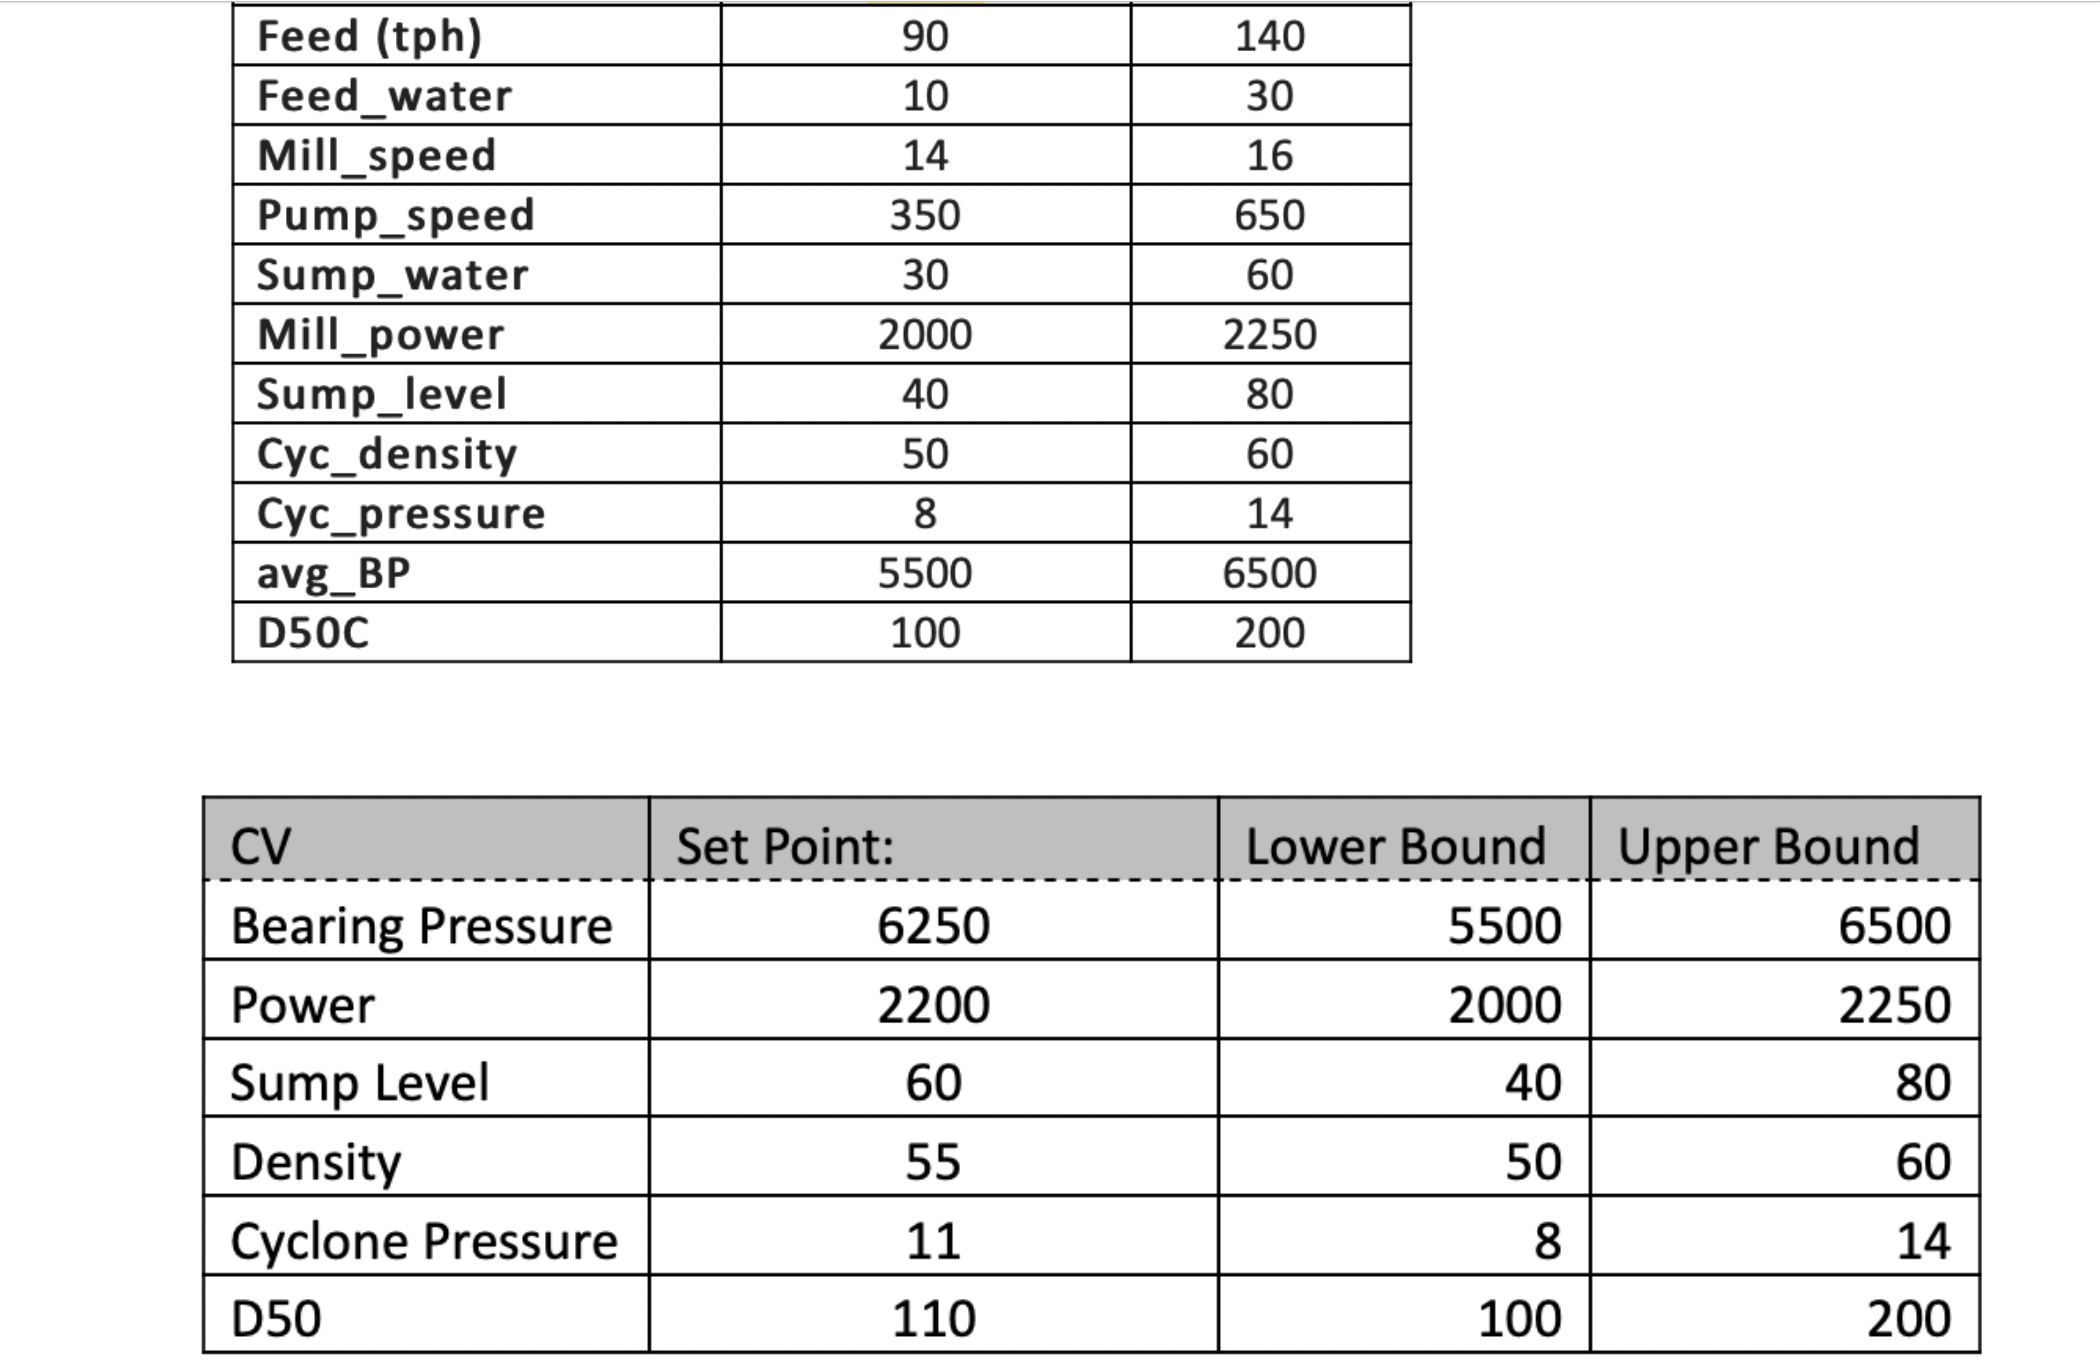

In [153]:
# indexx=df_5.columns
# for i in indexx:
#     plt.title(i)
#     df_5[i].plot(kind='kde',figsize=(15,1))
#     plt.show()

'F'

In [ ]:
# #first 70%
# s_train_df.plot(kind='line',subplots=True,layout=(14,1),figsize=(20,10))
# plt.show()

In [ ]:
# #70 % at end
# s_train_df.plot(kind='line',subplots=True,layout=(14,1),figsize=(20,10))
# plt.show()

In [ ]:
#for a single column filter. careful

# dd=pd.DataFrame(dfa['Sump_level'])

# dfa['Sump_level']=alpha_filter(dd,0.1)
# #could filter just the sump level data some more
# dfa.head()

In [ ]:
#gs=alpha_filter(df,0.4)
# gs.plot(kind='line',subplots=True,layout=(14,1),figsize=(20,10))
# plt.show()

In [ ]:

# gg.plot(kind='line',subplots=True,layout=(14,1),figsize=(20,10))
# plt.show()

In [ ]:
#gs.to_excel('a4.xlsx',header=True,index=False)

## Train Test Split

In [461]:
## Train Test Split

train = df2.copy()
test = df3.copy()
# Split into train and test subsets (30% for test)
#train, test = train_test_split(data, test_size=0.3, shuffle=False) #


In [413]:
#Min Max
train=(train-train.min())/(train.max())

In [ ]:
#Normal/ Min-max scaler:


# data = df_5.copy()
# # Split into train and test subsets (30% for test)
# test, train = train_test_split(data, test_size=0.3, shuffle=False)  #switched order so it could train on more recent data.

# s = StandardScaler()
# s_train = s.fit_transform(train)  #whole dataframe ppossilbe

# print("70% Training Split")
# # print('a: ', s.scale_)
# # print('Scaler mean')
# # print('b: ', s.mean_)
# # tr_std=s.scale_  # not valid for min max scale
# # tr_mean=s.mean_  #not valid for min max scale

# s_test = s.transform(test)


# # convert scaled values back to dataframe  
# #This is a scaled training and test dataset

# s_train_df = pd.DataFrame(s_train, columns=train.columns.values,index=train.index) #train index if partial
# s_test_df = pd.DataFrame(s_test, columns=test.columns.values,index=test.index)


# s_train_df=( s_train_df-s_train_df.min() ) /(s_train_df.max()-s_train_df.min())
# s_test_df =( s_test_df - s_test_df.min() ) /(s_test_df.max() -s_test_df.min ())

# #Standard scaler
# # s_train_df.plot(kind='kde',subplots=True,layout=(6,2),figsize=(10,6))
# # plt.show()


In [ ]:
# # Store training and testing data!
# s_train_df.to_excel('train70.xlsx',header=True,index=True)
# s_test_df.to_excel('test30.xlsx',header=True,index=True)

#### total data set distribution
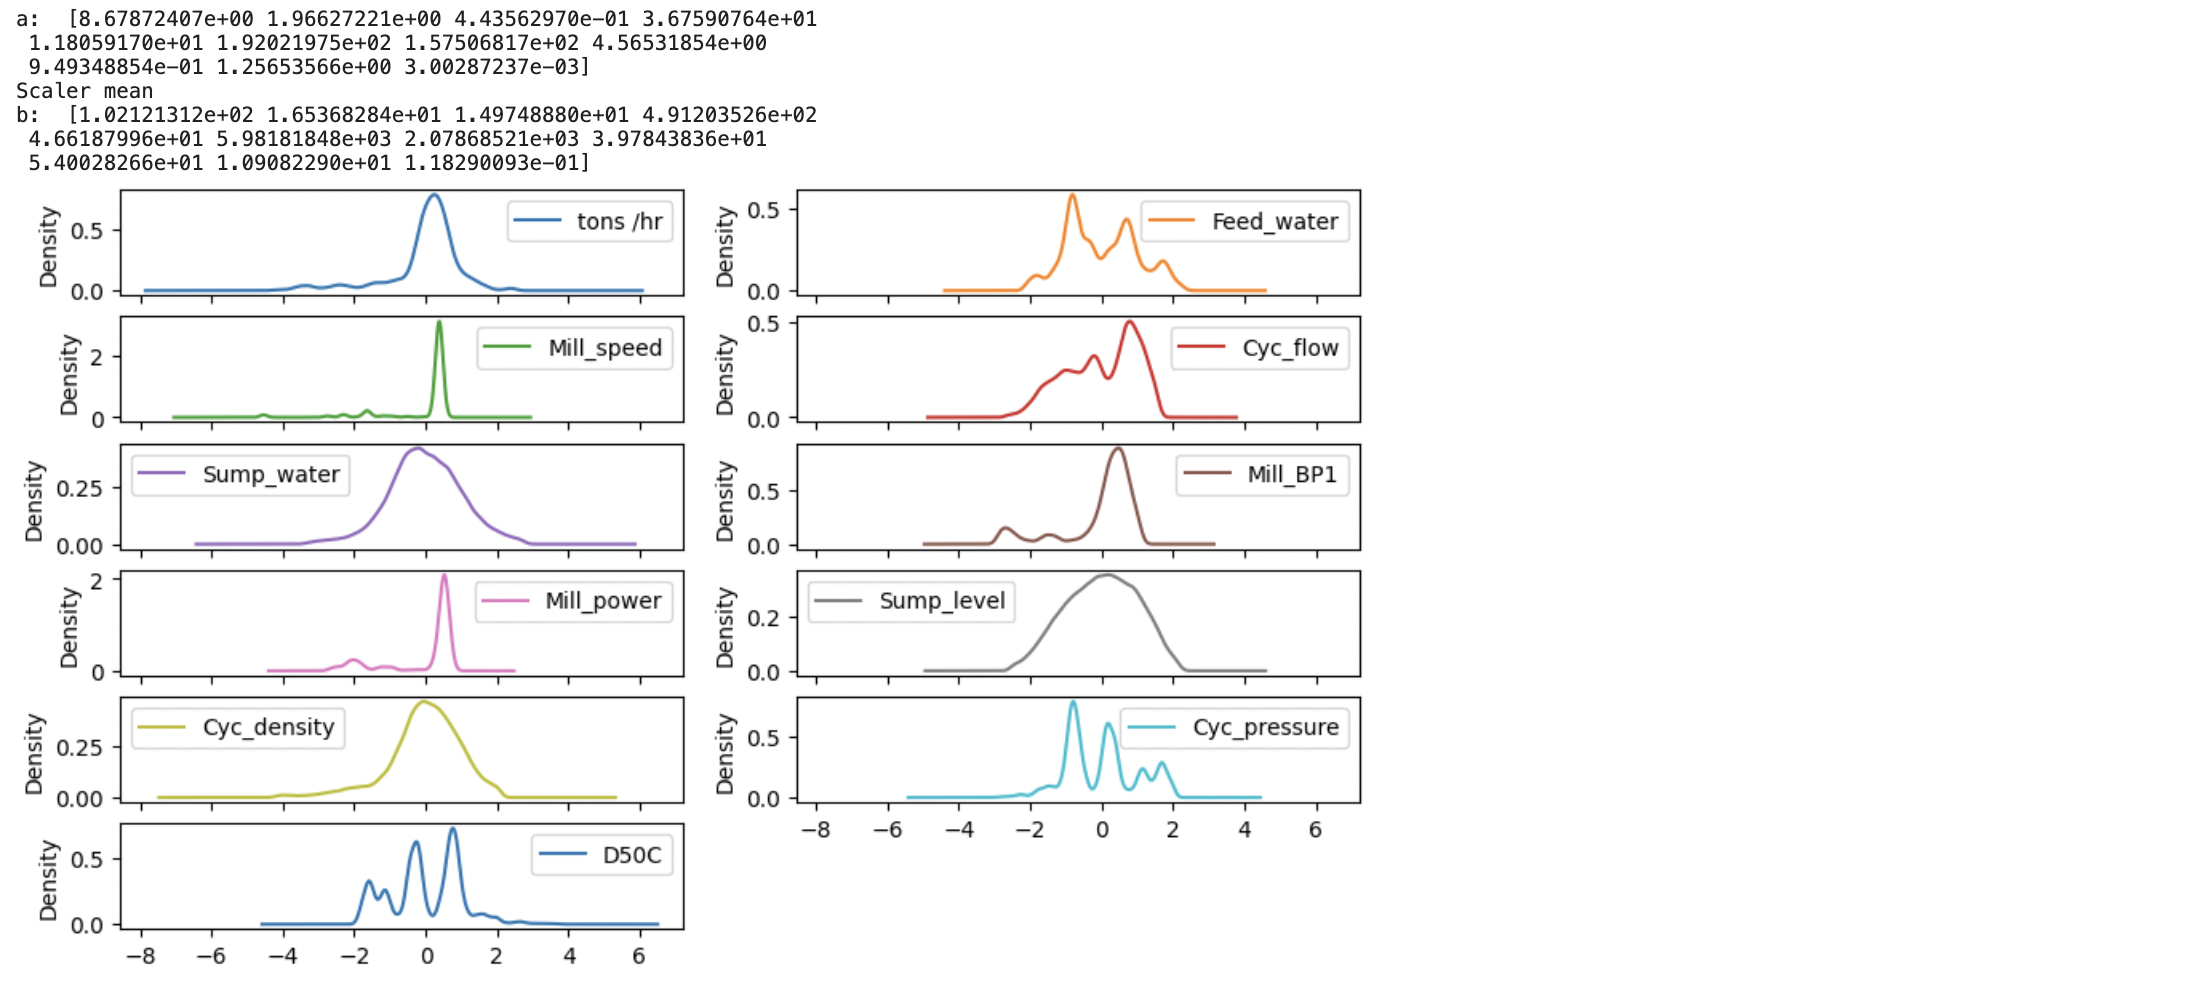

#### with 70 % split
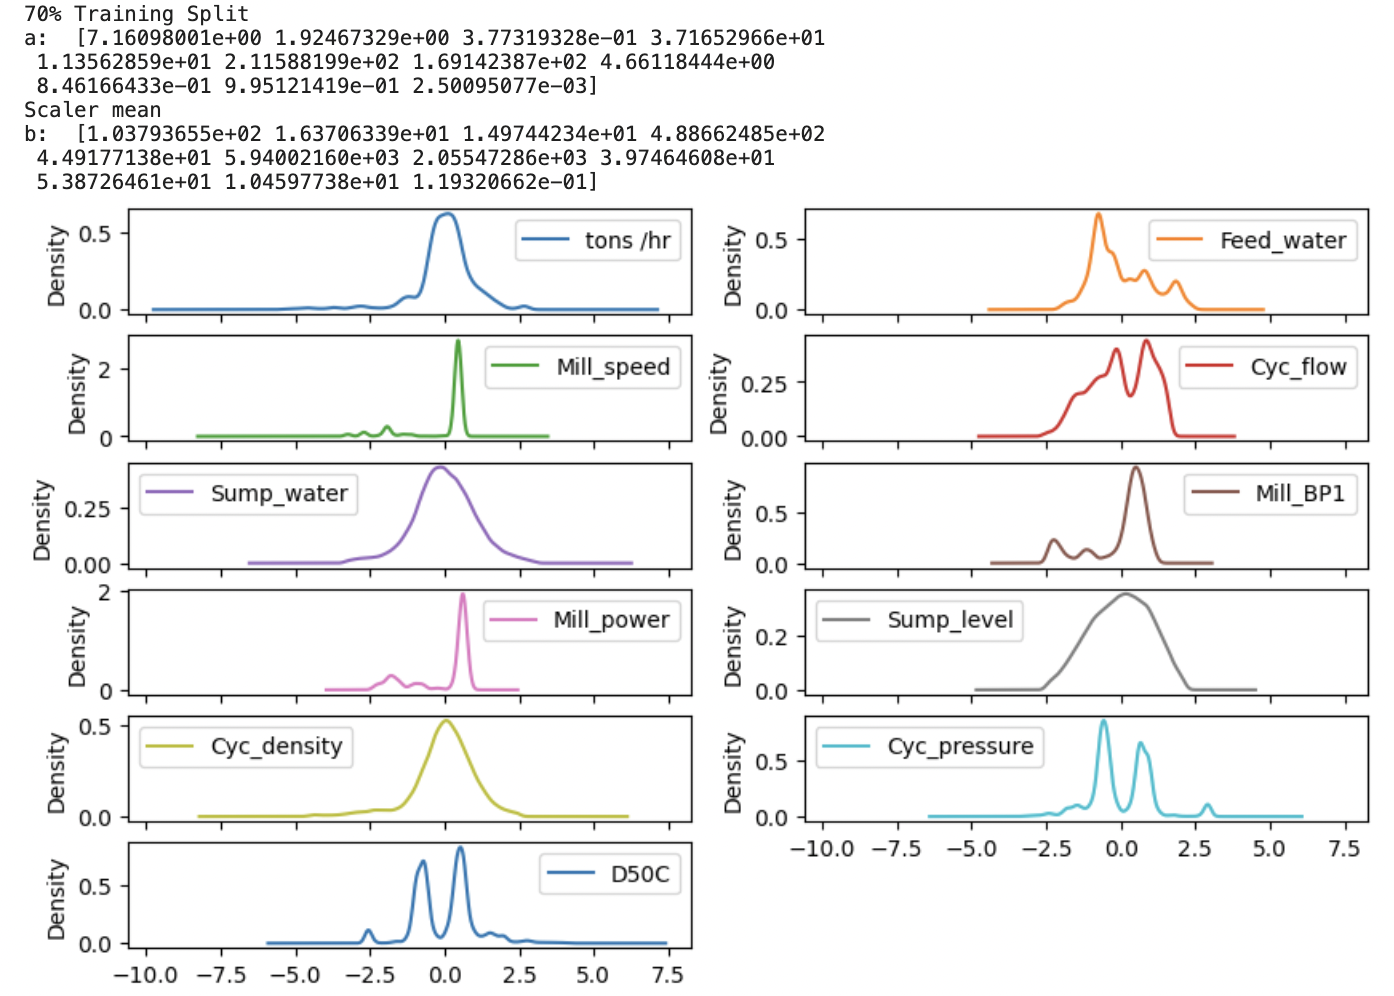

In [ ]:
#Could come back to

# %%capture

# # Data Filtering
# df0 = df0[~(df0['Date'] < '2019-11-02')]
# df = df0[(df0['Feed'] >= 0 )& (df0['Feed'] < 1600) &
#           (df0['Calc Ratio'] >= 0 )& (df0['Calc Ratio'] < 1) &
#           (df0['Disch_dens'] >= 0 )& (df0['Disch_dens'] < 2) &
#          (df0['Cyc_inlet'] < 10000) &
#           (df0['Load']>= 200)&
#           (df0['Cyc_Press']>= 0)&
#           (df0['Cyc_solid']< 10000)&
#           (df0['Cyc_water']< 10000)]
# df.dropna(inplace=True)

#df.reset_index(drop=True, inplace=True)

# train.columns = [ 'F', 'FW', 'MS', 'PS', 'SW', 'BP', 'P', 'SL', 'D', 'CP', 'D50']
# test.columns = [ 'F', 'FW', 'MS', 'PS', 'SW', 'BP', 'P', 'SL', 'D', 'CP', 'D50']

#s_train_df.columns = [ 'F', 'FW', 'MS', 'PS', 'SW', 'BP', 'P', 'SL', 'D', 'CP', 'D50']
#s_test_df.columns = [ 'F', 'FW', 'MS', 'PS', 'SW', 'BP', 'P', 'SL', 'D', 'CP', 'D50']
# df[['RW']] = df[['CW']].to_numpy() - df[['IW']].to_numpy() - df[['SL']].to_numpy()

In [ ]:
#mmtrain=(train-train.min())/train.max()

In [ ]:
# Test Data .  subtracts mean

#df.mean().to_numpy()
#df -= df.mean().to_numpy()
#df=df.reset_index()

#df=df.drop('index',axis=1)

##choose df for training:

# df=[]
# df=train #s_train_df.copy()

# df.columns = [ 'F', 'FW', 'MS', 'PS', 'SW', 'BP', 'P', 'SL', 'D', 'CP', 'D50']
# df.head()

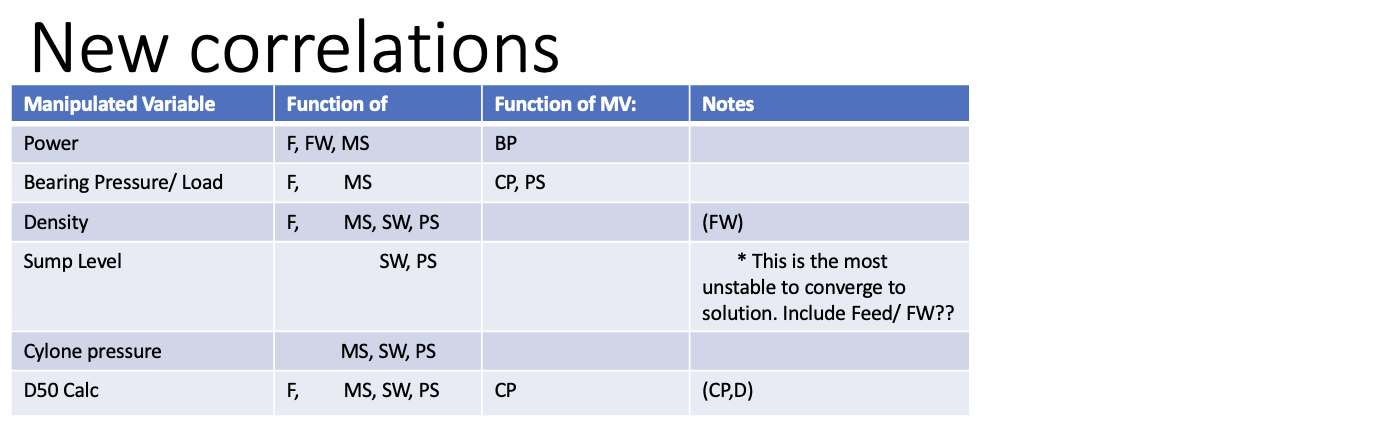

## Model Identification (ARX)

$$\large{y_{k+1} = \sum_{i=1}^{n_a} a_i y_{k-i+1} + \sum_{i=1}^{n_b} b_i u_{k-i-n_k+1}}$$

### MVs & CVs

In [5]:
MV = ['F', 'FW', 'MS', 'SW', 'PS']
CV = ['BP', 'P', 'SL', 'D', 'CP', 'D50']

In [6]:
w=3
df= []
df= df3.copy()  #train.copy()


#### Mill Power (P)

In [7]:
#P_arx = Ident(mv=['F','FW','MS','BP'], cv=['P'])
P_arx = Ident(mv=['F','MS'], cv=['P'])
P_arx.identify(df, na=[1, w], nb=[1, w], nk=[0, w]) # try just function of MVs
                                                    # try nk >5 ? 6 maybe better.

#### Sump Level (SL)

In [8]:
SL_arx = Ident(mv=['PS','SW'], cv=['SL'])
SL_arx.identify(df, na=[1, w], nb=[1, w], nk=[0, w])

#### Density (D)

In [9]:
D_arx = Ident(mv=['F', 'MS', 'PS', 'SW'], cv=['D'])
D_arx.identify(df, na=[1, w], nb=[1, w], nk=[0, w])

#### Bearing Pressure (BP)

In [10]:
#BP_arx = Ident(mv=['F','MS','CP','PS'], cv=['BP'])
BP_arx = Ident(mv=['F','MS','PS'], cv=['BP'])
BP_arx.identify(df, na=[1, w], nb=[1, w], nk=[0, w])

#### Cyclone Pressure (CP)

In [11]:
CP_arx = Ident(mv=['MS','SW','PS'], cv=['CP'])
CP_arx.identify(df, na=[1, w], nb=[1, w], nk=[0, w])

#### D50 Calc (D50)

In [12]:
#D50_arx = Ident(mv=['F','MS','SW','PS','CP'], cv=['D50'])
D50_arx = Ident(mv=['F','MS','SW','PS'], cv=['D50'])
D50_arx.identify(df, na=[1, w], nb=[1, w], nk=[0, w])

### Create Models Dictionary

In [13]:
models = {'BP': BP_arx,'P': P_arx, 'SL': SL_arx, 'D': D_arx,  'CP': CP_arx, 'D50': D50_arx }

## Create Simulation

In [45]:
df3.describe()

F            FW             P            MS      BP1_only  \
count  43568.000000  43568.000000  43568.000000  43568.000000  43568.000000   
mean     106.991300     18.780522   2161.993941     15.049348   6388.357525   
std       11.387959      5.267342     18.494017      0.814651    280.146801   
min       50.000000      0.023162   2100.000000      8.000000      0.010000   
25%      105.898829     17.135230   2152.000000     15.134733   6371.151489   
50%      108.859856     18.337050   2162.000000     15.144966   6404.015869   
75%      111.573311     19.627575   2174.000000     15.157894   6438.138794   
max      212.458511    110.179176   2304.000000     15.185266   6606.679688   

                 SW            SL             D            PS            CP  \
count  43568.000000  43568.000000  43568.000000  43568.000000  43568.000000   
mean      53.389879     39.555898     54.872874    524.732987     12.619572   
std       12.996430      6.504829      2.071954     42.908091      1.101002   
min        0.284370      0.010000     40.000000    200.000000      6.000000   
25%       46.407351     37.066175     54.734976    520.490295     12.348933   
50%       53.107807     39.298712     55.198725    531.103699     12.594109   
75%       59.858563     41.484098     55.656351    542.668457     13.369234   
max      206.774979    103.121300     60.277405    608.986755     16.284754   

                 BP           D50  
count  43568.000000  43568.000000  
mean    6055.105549      0.118070  
std       83.212912      0.036419  
min     5000.000000      0.108113  
25%     6020.461212      0.112909  
50%     6053.745483      0.114402  
75%     6097.307343      0.114898  
max     6826.300781      0.550136

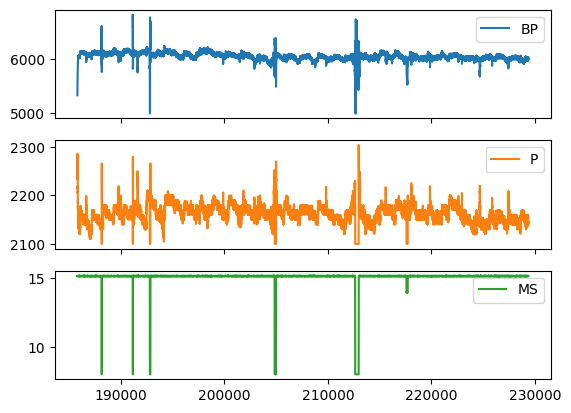

In [48]:

df3[['BP','P','MS']].plot(subplots=True)
plt.show()

In [99]:
df3['P']=df3['P'].clip(2100)
df3['BP']=df3['BP'].clip(5000)
df3['PS']=df3['PS'].clip(200)
df3['F']=df3['F'].clip(50)
df3['CP']=df3['CP'].clip(6)
df3['MS']=df3['MS'].clip(8)
df3['CP']=df3['CP'].clip(6)
df3['D']=df3['D'].clip(40)

In [100]:

train=df3.reset_index() #.copy()

In [105]:
from gekko import GEKKO
t = train['index']
u = train[['F','FW','MS','SW','PS']]
y = train[['P']]

# generate time-series model
m = GEKKO()

##################################################################
# system identification
na = 2 # output coefficients
nb = 2 # input coefficients
print('Identify model')
yp,p,K = m.sysid(t,u,y,na,nb,objf=1000,scale=True,diaglevel=1,pred='meas')


Identify model
---Final---
Gain
[[-0.44688837  0.02363249  0.23231022  0.11152861  0.03916466]]
alpha
[[0.61369151]
 [0.34921323]]
beta
[[[-1.88942508e-02 -2.37078137e-02  3.72096181e+00  1.48251110e-02
   -2.70676165e-02]
  [-1.92212631e-03  2.53313042e-02 -3.47629559e+00 -1.07378296e-02
    2.77922756e-02]]]
gamma
[78.1121616]


In [72]:
#p = {'a':A,'b':B,'c':C} #run to save
with open('p_gek_P_only.pkl', 'wb') as file:
    pickle.dump(p, file)

In [106]:
from gekko import GEKKO
t = train['index']
u = train[MV]
y = train[CV]

# generate time-series model
m = GEKKO()

##################################################################
# system identification
na = 2 # output coefficients
nb = 2 # input coefficients
print('Identify model')
yp,p,K = m.sysid(t,u,y,na,nb,objf=10000,scale=True,diaglevel=1,pred='meas')


Identify model
---Final---
Gain
[[ 0.15412663 -0.25235346 -0.0181843  -0.14728853  0.05210383]
 [-0.44688837  0.02363249  0.23231022  0.11152861  0.03916466]
 [ 0.43436877 -0.16646109  0.20867305  1.08427868 -0.81730391]
 [ 0.51036903 -0.17362579  0.87183551 -0.5430602  -0.20168641]
 [-1.01279303 -0.05127127 -4.94654733  0.22193491  7.5632102 ]
 [ 0.00924043 -0.11865739 -0.33513098 -0.02409346  0.11730384]]
alpha
[[ 0.91392654  0.61369151  0.9327777   0.75651676  0.79319513  0.73114779]
 [ 0.02459719  0.34921323 -0.02041746  0.1615088   0.21670254  0.16219971]]
beta
[[[ 5.07884916e-02 -1.61504846e-01  3.57853753e+00 -7.78978450e-02
    9.20301575e-02]
  [ 5.57275630e-02 -9.57010436e-02 -3.86267831e+00 -2.18665653e-03
   -7.77267257e-02]]

 [[-1.88942508e-02 -2.37078137e-02  3.72096181e+00  1.48251110e-02
   -2.70676165e-02]
  [-1.92212631e-03  2.53313042e-02 -3.47629559e+00 -1.07378296e-02
    2.77922756e-02]]

 [[ 4.37874912e-03  2.42697397e-02 -1.31995790e+00  1.74490246e-01
   -3.05

In [107]:
#p = {'a':A,'b':B,'c':C} #run to save
with open('p_gek_3er.pkl', 'wb') as file:
    pickle.dump(p, file)

In [ ]:
# DIY ARX  create and plot for one variable
 
# Could try scaling differently so coefficients are reasonable
# Try different variable.

import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt
%matplotlib inline

na = 2 # Number of A coefficients
nb = 2 # Number of B coefficients
ny = 1 # Number of outputs
nu = 3 # Number of inputs

# A (na x ny)

#CV
cv= 'CP'
#MVs
mv=['SW','MS','PS']

#my own a and b array
# if na==2:
#     A=np.array([[models[cv].alpha[cv][0]],[models[cv].alpha[cv][1]]])
# elif na==1:
#     A=np.array([[models[cv].alpha[cv][0]]])
# else:
#     print('add row to A matrix')
# #A = np.array([models['P'].alpha['P']])   


# # B (ny x (nb x nu))
# B=np.array([])
# b1=models[cv].beta[mv[0]][0]
# b2=models[cv].beta[mv[1]][0]
# b3=models[cv].beta[mv[2]][0]
# b4=models[cv].beta[mv[0]][1]
# b5=models[cv].beta[mv[1]][1]
# b6=models[cv].beta[mv[2]][1]
# B=np.array([[[b1,b2,b3],[b4,b5,b6]]])

# # for i in range(nb):
# #     L=[]
# #     for j in range(nu):
# #         L+=models[cv].beta[mv[j]][1]
# #         print(L)
# #     np.append(B,L,axis=0)
# print(B)

#C = np.array([0.0])

# create parameter dictionary
p = {'a':A,'b':B,'c':C}
#print(p)

# Create GEKKO model
m = GEKKO(remote=False)

y = m.Array(m.CV,1)
u = m.Array(m.MV,3)

y[0].value=df[cv].iloc[0]
#y[3].value=0.0 D



# Build GEKKO ARX model
y,u = m.arx(p,y,u)

# load inputs
tf = 120 # final time
u1 = np.zeros(tf+1)
u2 = u1.copy()
u3 = u2.copy()

# u1[30:60] = df_5[m1].median()
# u2[30:60] = df_5[m2].median()
# u3[30:60] = df_5[m3].median()

u1[-1] = df[mv[0]].iloc[tf]
u2[-1] = df[mv[1]].iloc[tf]
u3[-1] = df[mv[2]].iloc[tf]

u1[:-1] = df[mv[0]].iloc[:tf]
u2[:-1] = df[mv[1]].iloc[:tf]
u3[:-1] = df[mv[2]].iloc[:tf]

u[0].value = u1
u[1].value = u2
u[2].value = u3

# customize names
mv1 = u[0]; mv2 = u[1]; mv3 = u[2]
cv1 = y[0]; #cv2 = y[1]


# options
m.time = np.linspace(0,tf,tf+1)
m.options.imode = 4; m.options.nodes = 2

# simulate
m.solve(disp=False)


plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(m.time,mv1.value,'r-',label=r'$MV_1$')
plt.plot(m.time,mv2.value,'b--',label=r'$MV_2$')
plt.plot(m.time,mv3.value,'y--',label=r'$MV_3$')
plt.ylabel('MV')
plt.legend(loc='best')
plt.subplot(2,1,2)
plt.plot(m.time,cv1.value,'r:',label=r'$CV_1$')
#plt.plot(m.time,cv2.value,'b.-',label=r'$CV_2$')
plt.ylabel('CV'); plt.xlabel('Time (x2 min)')
plt.legend(loc='best')
plt.show()

In [446]:
int(np.around(df2[cv].max()))*0.6

14.399999999999999

## Create arrays for ARX

In [319]:
#B=np.array([B])
#display(A,B,C)

array([[ 1.02453897,  0.98517056,  0.5105138 ,  0.67819536,  0.71033351,
         0.60359317],
       [-0.04897976,  0.        ,  0.22666676,  0.24427325,  0.14535414,
         0.0476174 ]])

array([[[[ 2.13680048e-01,  0.00000000e+00, -2.76780157e+01,
           1.29575337e-01,  0.00000000e+00],
         [ 1.12803081e-01, -1.44755825e-01,  1.10663124e+02,
           0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          -3.51338619e-02,  1.51832893e-01],
         [ 4.53135352e-03,  0.00000000e+00,  4.17632552e-01,
          -1.30229641e-03, -3.69656054e-03],
         [ 0.00000000e+00,  0.00000000e+00, -1.34322273e-03,
           1.96463228e-02, -4.45355041e-04],
         [-5.63785436e-06,  0.00000000e+00, -3.16995093e-04,
          -1.30602516e-04,  1.31358642e-05]],

        [[ 8.73331000e-03,  0.00000000e+00,  2.68288832e+01,
          -1.46256707e-01,  0.00000000e+00],
         [-1.08528507e-01,  1.86750843e-01, -1.08954311e+02,
           0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           1.26345473e-02, -1.04559119e-01],
         [ 1.00721037e-03,  0.00000000e+00, 

array([0., 0., 0., 0., 0., 0.])

In [24]:
A=np.zeros((3,len(models))) # (na x ny) (2 or 3 x 6)
for i, tag in enumerate(models):
    cv=tag
    na=models[tag].na_best
    nb=models[tag].nb_best
    if na==1:
        A[0][i]= models[cv].alpha[cv][0]
    elif na==2:
        A[0][i]= models[cv].alpha[cv][0]
        A[1][i]= models[cv].alpha[cv][1]
    elif na==3:
        A[0][i]= models[cv].alpha[cv][0]
        A[1][i]= models[cv].alpha[cv][1]
        A[2][i]= models[cv].alpha[cv][2]
    else:
        raise error

        #ny x (nb x nu)   2 x (1 x 3) ... 6 x(3x5)  set it here
B=np.zeros((6,3,5)) # 3 rows of beta coef, 6 columns of ARX CV out, stacks of 5 inputs
for i, tag in enumerate(models):
    for j in range(len(B[0])):
        for k, jag in enumerate(MV):
            try:
                B[i][j][k]= models[tag].beta[jag][j]
            except:
                pass

C=np.zeros(len(models))

In [25]:
p = {'a':A,'b':B,'c':C} #run to save
with open('p_hm_1.pkl', 'wb') as file:
    pickle.dump(p, file)

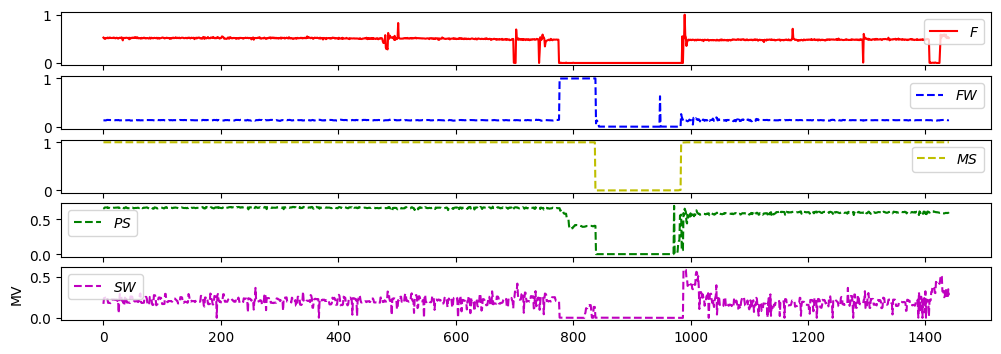

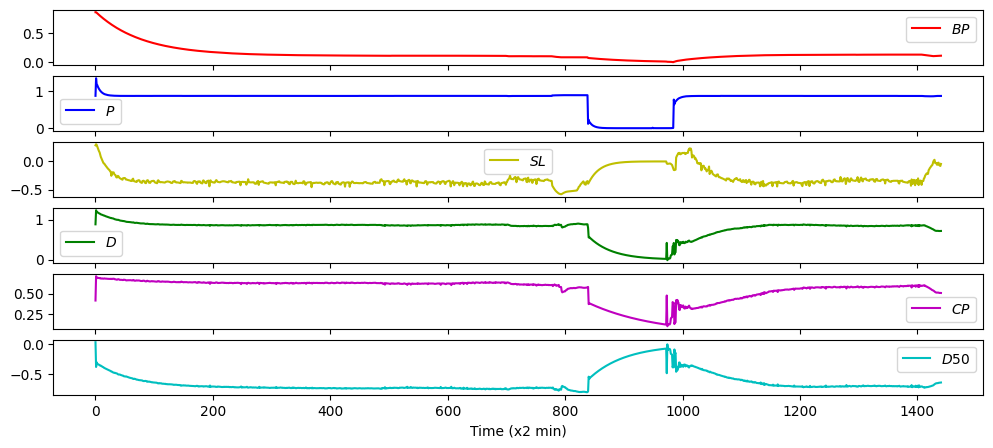

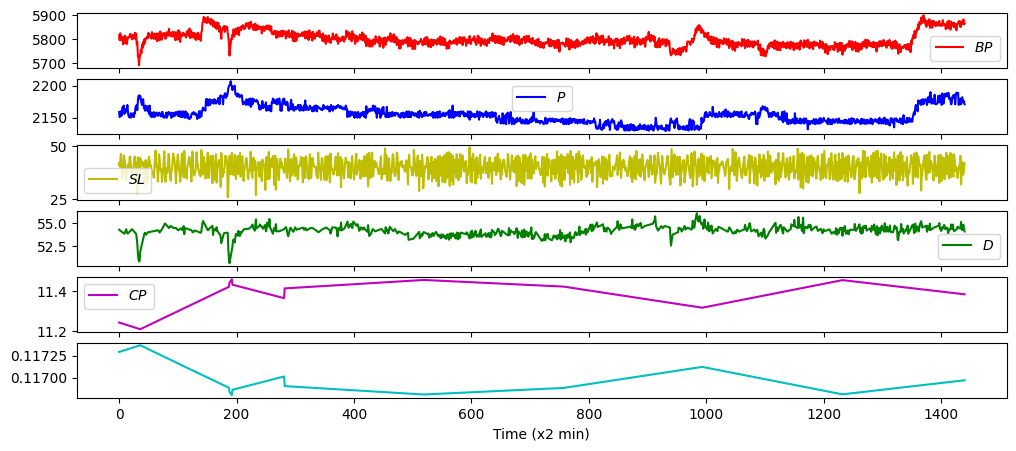

In [465]:
# DIY FULL ARX
 
# Could try scaling differently so coefficients are reasonable
# Try different variable.

import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt
%matplotlib inline

na = 2 # Number of A coefficients
nb = 2 # Number of B coefficients
ny = 6 # Number of outputs
nu = 5 # Number of inputs


# A (na x ny)
# B (ny x (nb x nu))
# C (ny)
# create parameter dictionary
p = {'a':A,'b':B,'c':C}

# Create GEKKO model
m = GEKKO(remote=False)

# Build GEKKO ARX model

y = m.Array(m.CV,6)
u = m.Array(m.MV,5)

for i in range(len(y)):
    y[i].value=df[CV[i]].iloc[0]
#y[3].value=0.0 D

y,u = m.arx(p,y,u)

# # rename CVs
# TC1 = y[0]
# TC2 = y[1]

# # rename MVs
# Q1 = u[0]
# Q2 = u[1]


# load inputs
tf = 1440 # final time
u1 = np.zeros(tf+1)
u2 = u1.copy()
u3 = u2.copy()
u4 = u3.copy()
u5 = u4.copy()

# u1[:] = df_5[MV[0]].median()
# u2[:] = df_5[MV[1]].median()
# u3[:] = df_5[MV[2]].median()
# u4[:] = df_5[MV[3]].median()
# u5[:] = df_5[MV[4]].median()

u1[0:] = df[MV[0]].iloc[0:tf+1]
u2[0:] = df[MV[1]].iloc[0:tf+1]
u3[0:] = df[MV[2]].iloc[0:tf+1]
u4[0:] = df[MV[3]].iloc[0:tf+1]
u5[0:] = df[MV[4]].iloc[0:tf+1]

u[0].value = u1
u[1].value = u2
u[2].value = u3
u[3].value = u4
u[4].value = u5

# customize names
mv1 = u[0]; mv2 = u[1]; mv3 = u[2]; mv4 = u[3]; mv5 = u[4]
cv1 = y[0]; cv2 = y[1]; cv3 = y[2]; cv4 = y[3]; cv5 = y[4]; cv6 = y[5]


# options
m.time = np.linspace(0,tf,tf+1)
m.options.imode = 4; m.options.nodes = 2

# simulate
m.solve(disp=False)
#m.time=m.time[20:]
plt.figure(0,figsize=(12,4))
plt.subplot(5,1,1)
plt.plot(m.time,mv1.value,'r-',label=r'$F$');plt.legend(loc='best')
plt.subplot(5,1,2)
plt.plot(m.time,mv2.value,'b--',label=r'$FW$');plt.legend(loc='best')
plt.subplot(5,1,3)
plt.plot(m.time,mv3.value,'y--',label=r'$MS$');plt.legend(loc='best')
plt.subplot(5,1,4)
plt.plot(m.time,mv4.value,'g--',label=r'$PS$');plt.legend(loc='best')
plt.subplot(5,1,5)
plt.plot(m.time,mv5.value,'m--',label=r'$SW$');plt.legend(loc='best')
plt.ylabel('MV')
plt.legend(loc='best')
plt.figure(1,figsize=(12,5))
plt.subplot(6,1,1)
plt.plot(m.time,cv1.value,'r-',label=r'$BP$');plt.legend(loc='best')
plt.subplot(6,1,2)
plt.plot(m.time,cv2.value,'b-',label=r'$P$');plt.legend(loc='best')
plt.subplot(6,1,3)
plt.plot(m.time,cv3.value,'y-',label=r'$SL$');plt.legend(loc='best')
plt.subplot(6,1,4)
plt.plot(m.time,cv4.value,'g-',label=r'$D$');plt.legend(loc='best')
plt.subplot(6,1,5)
plt.plot(m.time,cv5.value,'m-',label=r'$CP$');plt.legend(loc='best')
plt.subplot(6,1,6)
plt.plot(m.time,cv6.value,'c-',label=r'$D50$'); plt.xlabel('Time (x2 min)');
plt.legend(loc='best')
plt.show();
plt.figure(2,figsize=(12,5))
plt.subplot(6,1,1)
plt.plot(m.time,df_5[CV[0]].iloc[:tf+1],'r-',label=r'$BP$');plt.legend(loc='best')
plt.subplot(6,1,2)
plt.plot(m.time,df_5[CV[1]].iloc[:tf+1],'b-',label=r'$P$');plt.legend(loc='best')
plt.subplot(6,1,3)
plt.plot(m.time,df_5[CV[2]].iloc[:tf+1],'y-',label=r'$SL$');plt.legend(loc='best')
plt.subplot(6,1,4)
plt.plot(m.time,df_5[CV[3]].iloc[:tf+1],'g-',label=r'$D$');plt.legend(loc='best')
plt.subplot(6,1,5)
plt.plot(m.time,df_5[CV[4]].iloc[:tf+1],'m-',label=r'$CP$');plt.legend(loc='best')
plt.subplot(6,1,6)
plt.plot(m.time,df_5[CV[5]].iloc[:tf+1],'c-',label=r'$D50$'); plt.xlabel('Time (x2 min)');

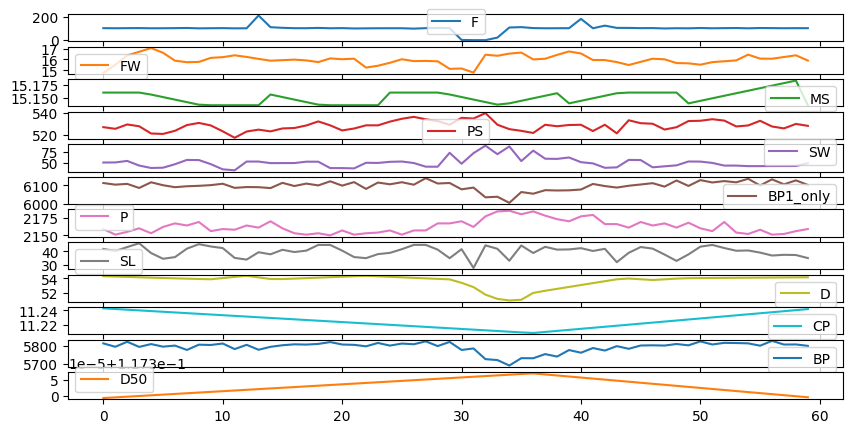

In [360]:
df_5.iloc[0:60].plot(subplots=True,figsize=(10,5))
plt.show()

In [ ]:
MV = ['F', 'FW', 'MS', 'PS', 'SW']
CV = ['BP', 'P', 'SL', 'D', 'CP', 'D50']

In [466]:
with open('p_p_p.pkl', 'wb') as file:
    pickle.dump(p, file)

In [189]:
{'a': array([[0.71033351],
       [0.14535414]]), 'b': array([[[-0.00044536,  0.00019829],
        [-0.00134322, -0.00562536],
        [ 0.01964632, -0.01630459]]]), 'c': array([0.])}

{'a': array([[0.71033351],
        [0.14535414]]),
 'b': array([[[-0.00044536,  0.00019829],
         [-0.00134322, -0.00562536],
         [ 0.01964632, -0.01630459]]]),
 'c': array([0.])}

In [41]:
# from gekko import GEKKO 
# m=GEKKO(remote=False)

# # create control ARX model
# y = m.Array(m.CV,1)
# u = m.Array(m.MV,3)
# m.arx(p,y,u)

# # rename CVs
# TC1 = y[0]   #TC1 is power

# # rename MVs
# Q1 = u[0]   #Q1 is Feed
# Q3 = u[2]   #Q3 is Feed water   #may need to add down lower
# Q2 = u[1]   #Q2 is Mill Speed

# # steady state initialization
# m.options.IMODE = 1      # will this work like this?
# m.solve(disp=False)

# # set up MPC
# m.options.IMODE   = 6 # MPC
# m.options.CV_TYPE = 1 # Objective type
# m.options.NODES   = 2 # Collocation nodes
# m.options.SOLVER  = 3 # IPOPT
# m.time=np.linspace(0,120,61)

# # Manipulated variables
# Q1.STATUS = 1  # manipulated
# Q1.FSTATUS = 0 # not measured
# Q1.DMAX = 50.0
# Q1.DCOST = 0.1
# Q1.UPPER = 100.0
# Q1.LOWER = 0.0

# Q2.STATUS = 1  # manipulated
# Q2.FSTATUS = 0 # not measured
# Q2.DMAX = 50.0
# Q2.DCOST = 0.1
# Q2.UPPER = 100.0
# Q2.LOWER = 0.0

# # Controlled variables
# TC1.STATUS = 1     # drive to set point
# TC1.FSTATUS = 1    # receive measurement
# TC1.TAU = 20       # response speed (time constant)
# TC1.TR_INIT = 2    # reference trajectory
# TC1.TR_OPEN = 0

# TC2.STATUS = 1     # drive to set point
# TC2.FSTATUS = 1    # receive measurement
# TC2.TAU = 20        # response speed (time constant)
# TC2.TR_INIT = 2    # dead-band
# TC2.TR_OPEN = 1

# ##################################################################
# # Create plot
# plt.figure(figsize=(10,7))
# plt.ion()
# plt.show()

# # Main Loop
# start_time = time.time()
# prev_time = start_time
# tm = np.zeros(n)

# try:
#     for i in range(1,n-1):       # change the time step to 2 minutes for fun and change measurement to take from data frame.
#         # Sleep time
#         sleep_max = 2.0
#         sleep = sleep_max - (time.time() - prev_time)
#         if sleep>=0.01:
#             time.sleep(sleep-0.01)
#         else:
#             time.sleep(0.01)

#         # Record time and change in time
#         t = time.time()
#         dt = t - prev_time
#         prev_time = t
#         tm[i] = t - start_time

#         # Read temperatures in Celsius 
#         T1m[i] = a.T1
#         T2m[i] = a.T2

#         # Insert measurements
#         TC1.MEAS = T1m[i]
#         TC2.MEAS = T2m[i]

#         # Adjust setpoints
#         db1 = 1.0 # dead-band
#         TC1.SPHI = T1sp[i] + db1
#         TC1.SPLO = T1sp[i] - db1

#         db2 = 0.2
#         TC2.SPHI = T2sp[i] + db2
#         TC2.SPLO = T2sp[i] - db2

#         # Adjust heaters with MPC
#         m.solve() 

#         if m.options.APPSTATUS == 1:
#             # Retrieve new values
#             Q1s[i+1]  = Q1.NEWVAL
#             Q2s[i+1]  = Q2.NEWVAL
#             # get additional solution information
#             with open(m.path+'//results.json') as f:
#                 results = json.load(f)
#         else:
#             # Solution failed
#             Q1s[i+1]  = 0.0
#             Q2s[i+1]  = 0.0

#         # Write new heater values (0-100)
#         a.Q1(Q1s[i])
#         a.Q2(Q2s[i])

#         # Plot
#         plt.clf()
#         ax=plt.subplot(3,1,1)
#         ax.grid()
#         plt.plot(tm[0:i+1],T1sp[0:i+1]+db1,'k-',\
#                  label=r'$T_1$ target',lw=3)
#         plt.plot(tm[0:i+1],T1sp[0:i+1]-db1,'k-',\
#                  label=None,lw=3)
#         plt.plot(tm[0:i+1],T1m[0:i+1],'r.',label=r'$T_1$ measured')
#         plt.plot(tm[i]+m.time,results['v1.bcv'],'r-',\
#                  label=r'$T_1$ predicted',lw=3)
#         plt.plot(tm[i]+m.time,results['v1.tr_hi'],'k--',\
#                  label=r'$T_1$ trajectory')
#         plt.plot(tm[i]+m.time,results['v1.tr_lo'],'k--')
#         plt.ylabel('Temperature (degC)')
#         plt.legend(loc=2)
#         ax=plt.subplot(3,1,2)
#         ax.grid()        
#         plt.plot(tm[0:i+1],T2sp[0:i+1]+db2,'k-',\
#                  label=r'$T_2$ target',lw=3)
#         plt.plot(tm[0:i+1],T2sp[0:i+1]-db2,'k-',\
#                  label=None,lw=3)
#         plt.plot(tm[0:i+1],T2m[0:i+1],'b.',label=r'$T_2$ measured')
#         plt.plot(tm[i]+m.time,results['v2.bcv'],'b-',\
#                  label=r'$T_2$ predict',lw=3)
#         plt.plot(tm[i]+m.time,results['v2.tr_hi'],'k--',\
#                  label=r'$T_2$ range')
#         plt.plot(tm[i]+m.time,results['v2.tr_lo'],'k--')
#         plt.ylabel('Temperature (degC)')
#         plt.legend(loc=2)
#         ax=plt.subplot(3,1,3)
#         ax.grid()
#         plt.plot([tm[i],tm[i]],[0,100],'k-',\
#                  label='Current Time',lw=1)
#         plt.plot(tm[0:i+1],Q1s[0:i+1],'r.-',\
#                  label=r'$Q_1$ history',lw=2)
#         plt.plot(tm[i]+m.time,Q1.value,'r-',\
#                  label=r'$Q_1$ plan',lw=3)
#         plt.plot(tm[0:i+1],Q2s[0:i+1],'b.-',\
#                  label=r'$Q_2$ history',lw=2)
#         plt.plot(tm[i]+m.time,Q2.value,'b-',
#                  label=r'$Q_2$ plan',lw=3)
#         plt.plot(tm[i]+m.time[1],Q1.value[1],color='red',\
#                  marker='.',markersize=15)
#         plt.plot(tm[i]+m.time[1],Q2.value[1],color='blue',\
#                  marker='X',markersize=8)
#         plt.ylabel('Heaters')
#         plt.xlabel('Time (sec)')
#         plt.legend(loc=2)
#         plt.draw()
#         plt.pause(0.05);

SyntaxError: unexpected EOF while parsing (<ipython-input-41-bb86bb794f5b>, line 169)

In [ ]:
controller ^^^^

### Visualization

In [ ]:
n_fig = len(models)
fig = make_subplots(rows=3, cols=3, horizontal_spacing=0.1, vertical_spacing=0.05)
n_row = 1
n_col = 2
for ind, tag in enumerate(models.keys()):
    fig.add_trace(
        go.Scatter(y=models[tag].Y_pred, name=tag + ' Pred'),
        row=n_row, col=n_col
    )
    fig.add_trace(
        go.Scatter(y=models[tag].Y_real, name=tag + ' Meas', line=dict(dash='dashdot')),
        row=n_row, col=n_col
    )
    fig['layout']['yaxis'+str(ind+2)]['title']=tag
    n_col += 1
    if (ind+2)%3 == 0:
        n_row += 1
        n_col = 1
        
fig['layout']['xaxis'+str(n_fig)]['title']='Time'

fig.update_layout(height=1000, width=1000)
fig.show()

In [146]:
n_fig = len(models)
fig = make_subplots(rows=3, cols=3, horizontal_spacing=0.1, vertical_spacing=0.05)

for ind, tag in enumerate(models.keys()):
    fig.add_trace(
        go.Scatter(x=models[tag].Y_real, y=models[tag].Y_pred, name=tag, mode='markers'),
        row=(ind+1)//3+1, col=(ind+1)%3+1
    )
    # fig.add_trace(
    #     go.Scatter(y=models[tag].Y_real, name=tag + ' Meas', line=dict(dash='dashdot')),
    #     row=ind+1, col=1
    # )
    fig['layout']['yaxis'+str(ind+2)]['title']=tag

fig['layout']['xaxis'+str(n_fig)]['title']='Time'

fig.update_layout(height=1000, width=1100)
fig.update_traces(marker=dict(size=8,
                              line=dict(width=0.5,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
# fig.show()
fig.write_html("pred_meas_2_coef.html")    #will have to change to underscore if rewriting

### Save Models

In [19]:
with open('models_00.pkl', 'wb') as file:
    pickle.dump(models, file)

In [147]:
print('Training Results')
for tag in CV:
    print(tag)
    print('-------')
    print('MSE: ', f' {mean_squared_error(models[tag].Y_real, models[tag].Y_pred):.4f}')
    print('RMSE: ', f'{sqrt(mean_squared_error(models[tag].Y_real, models[tag].Y_pred)):.4f}')
    print('MAE: ', f' {mean_absolute_error(models[tag].Y_real, models[tag].Y_pred):.4f}')
    print('R2: ', f'  {r2_score(models[tag].Y_real, models[tag].Y_pred):.4f}')
    print('')


Training Results
BP
-------
MSE:   689.4284
RMSE:  26.2570
MAE:   18.2746
R2:    0.9516

P
-------
MSE:   236.7542
RMSE:  15.3868
MAE:   5.4575
R2:    0.9991

SL
-------
MSE:   18.0537
RMSE:  4.2490
MAE:   3.2376
R2:    0.9071

D
-------
MSE:   1.5234
RMSE:  1.2343
MAE:   0.2590
R2:    0.9902

CP
-------
MSE:   0.0816
RMSE:  0.2856
MAE:   0.1682
R2:    0.9882

D50
-------
MSE:   0.0000
RMSE:  0.0023
MAE:   0.0016
R2:    0.9860



In [ ]:
models['SL'].['SW'] #.dot(cv_dict['SL'][P-i:P-i+models['SL'].na_best])

Testing Results
BP
-------
MSE:      9832.6991
MAE:      22.9652
R2:       0.9513
MAE/mean  0.4079 %
mean      5629.8473

P
-------
MSE:      1259.0010
MAE:      6.6945
R2:       0.9912
MAE/mean  0.3389 %
mean      1975.4111

SL
-------
MSE:      25.7933
MAE:      3.8720
R2:       0.7932
MAE/mean  9.4795 %
mean      40.8465

D
-------
MSE:      4.6325
MAE:      0.3569
R2:       0.9453
MAE/mean  0.6843 %
mean      52.1566

CP
-------
MSE:      0.1680
MAE:      0.2490
R2:       0.9677
MAE/mean  2.4801 %
mean      10.0418

D50
-------
MSE:      0.0000
MAE:      0.0015
R2:       0.9727
MAE/mean  1.2465 %
mean      0.1226



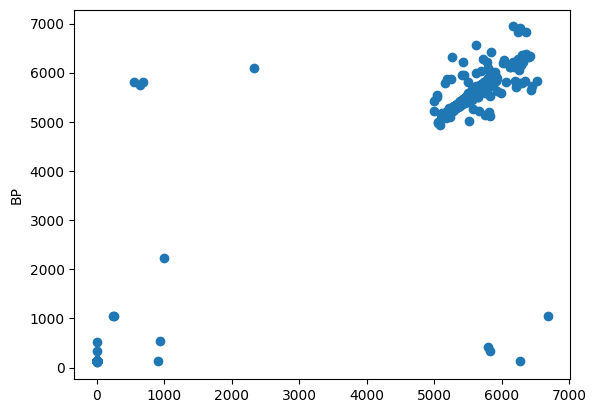

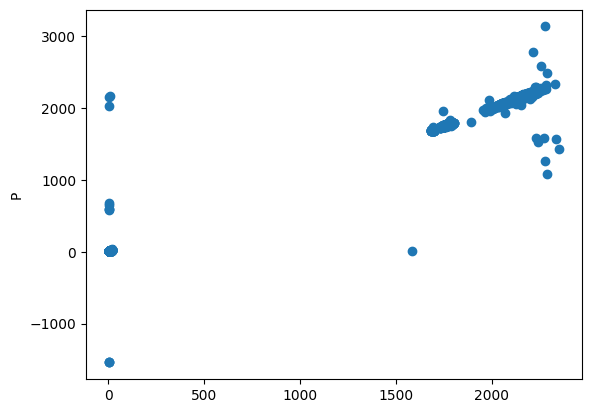

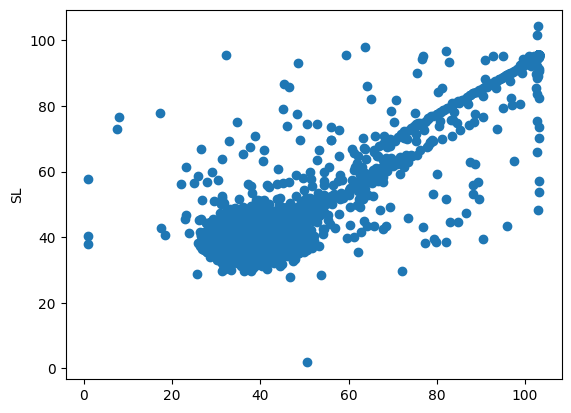

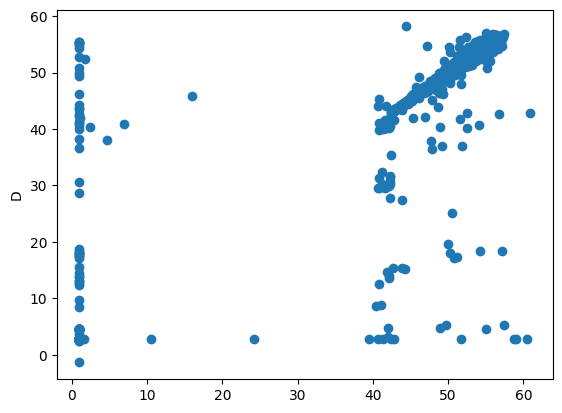

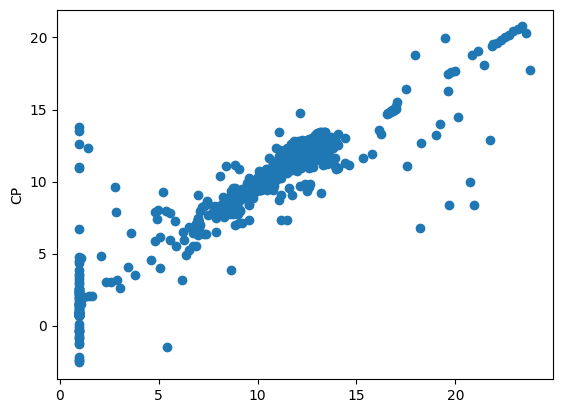

In [167]:
# testing on test data

dft= test.copy() #this is test 

mean=train[CV].mean()

# Split the test data into input and output variables
X_test = dft[MV] # test[:,2:]
y_test = dft[CV] # test[:,1]

mse=np.zeros(len(models))
r2 =np.zeros(len(models))
mae=np.zeros(len(models))
mae_per=np.zeros(len(models))


# Make predictions on the test set

for i, tag in enumerate(models.keys()):
    y_pred = models[tag].predict(dft)
    plt.figure(i)
    plt.scatter(y_test[tag],y_pred)
    plt.ylabel(tag)
    #subplots. do in sep for loop
#     plt.figure(i,figsize=(5,5))
#     plt.scatter(y_pred,dft[tag])
#     plt.grid()
    #plt.show()
    
    # Calculate the mean squared error
    r2[i]  = r2_score(y_test[tag], y_pred)
    mse[i] = mean_squared_error(y_test[tag], y_pred)
    mae[i] = mean_absolute_error(y_test[tag], y_pred)
    mae_per[i] = mae[i]/mean[i] *100

    
# print(y_test.columns)
# print('Mean Squared Error:', mse)
# print('R_Squared', r2)

print('Testing Results')
for i, tag in enumerate(CV):
    print(tag)
    print('-------')

    print('MSE:     ', f'{mse[i]:.4f}')
    print('MAE:     ', f'{mae[i]:.4f}')
    print('R2:      ', f'{r2[i]:.4f}')
    print('MAE/mean ',f'{mae_per[i]:.4f}', '%')
    print('mean     ',f'{mean[i]:.4f}')
    print('')
    
#print(f'{x:.2f}') for rounding

In [ ]:
test.describe()

In [168]:
#Show best coef:

for tag in CV:
    print(tag)
    print('-------')
    print('na: ', models[tag].na_best)
    print('nb: ', models[tag].nb_best)
    print('nk: ', models[tag].nk_best)
    print('')


BP
-------
na:  2
nb:  2
nk:  0

P
-------
na:  1
nb:  2
nk:  0

SL
-------
na:  2
nb:  2
nk:  1

D
-------
na:  2
nb:  2
nk:  1

CP
-------
na:  2
nb:  2
nk:  0

D50
-------
na:  2
nb:  2
nk:  0



In [63]:
#Plot window:

n_fig = len(models)
fig = make_subplots(rows=6, cols=1, horizontal_spacing=0.1, vertical_spacing=0.02)
n_row = 1
n_col = 2
cnt = 0
for ind, tag in enumerate(models.keys()):
    if ind not in [7,7]:
        fig.add_trace(
            go.Scatter(y=models[tag].Y_pred[800:1300], name=tag + ' Pred', legendgroup=cnt+1),
            row=cnt+1, col=1
        )
        fig.add_trace(
            go.Scatter(y=models[tag].Y_real[800:1300], name=tag + ' Meas', line=dict(dash='dashdot'), legendgroup=cnt+1),
            row=cnt+1, col=1,
        )
        fig['layout']['yaxis'+str(cnt+1)]['title']=tag

        cnt += 1

fig['layout']['xaxis'+str(cnt)]['title']='Time'

fig.update_layout(height=1550, width=500, legend_tracegroupgap = 195)
fig.show()
fig.write_html("_modeling_05.html")